## Logistic Regression

Just like Linear Regression Model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the *logistic* of this result

*Logistic Regression model estimated probability (vectorized form)*:
$$\hat{p}=h_{\theta}(x)=\sigma(x^{T}\theta)$$

The logistic - noted $\sigma(\cdot)$ - is a *sigmoid function* that outputs a number between 0 and 1.

*Logistic function*:
$$\sigma(t)=\frac{1}{1+\text{exp}(-t)}$$

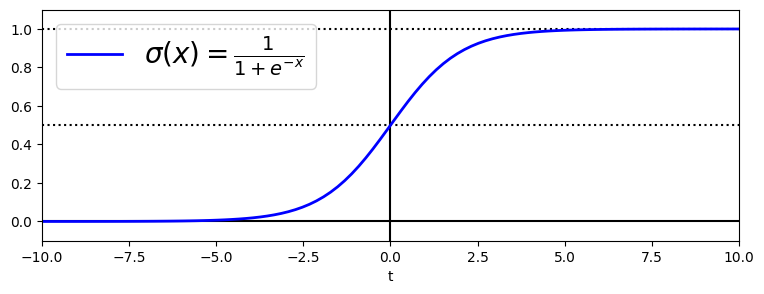

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(x, y, "b-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### Training and Cost function

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y=1$) and low probabilities for negative instances ($y=0$).

*Cost function of a single training instance*:
$$
c(\theta)=
\begin{equation}
    \begin{cases}
      -\log{(\hat{p})} && y=1 \\
      -\log{(1-\hat{p})} && y=0
    \end{cases}
\end{equation}
$$


*Logistic Regression cost function (log loss)*:
$$
J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log\left( \hat{p}^{(i)} \right) + \left(1 - y^{(i)}\right) \log\left(1 - \hat{p}^{(i)}\right) \right]
$$

The bad news is that there is no known closed-form equations to compute the value of $\theta$ that minimizes the cost function, but the this cost function is convex, hence Gradient Descent is guaranteed to find the global minimum

*Logistic cost function partial derivatives*:
$$
\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma\left(\boldsymbol{\theta}^\top \mathbf{x}^{(i)}\right) - y^{(i)} \right) x_j^{(i)}
$$

In [50]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [51]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


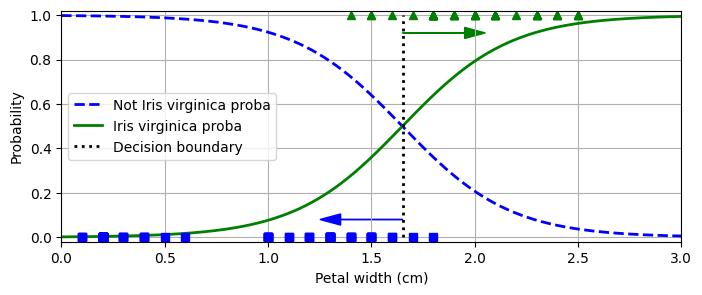

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
		 label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
		 label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
		  head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
		  head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [54]:
decision_boundary

np.float64(1.6516516516516517)

In [55]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

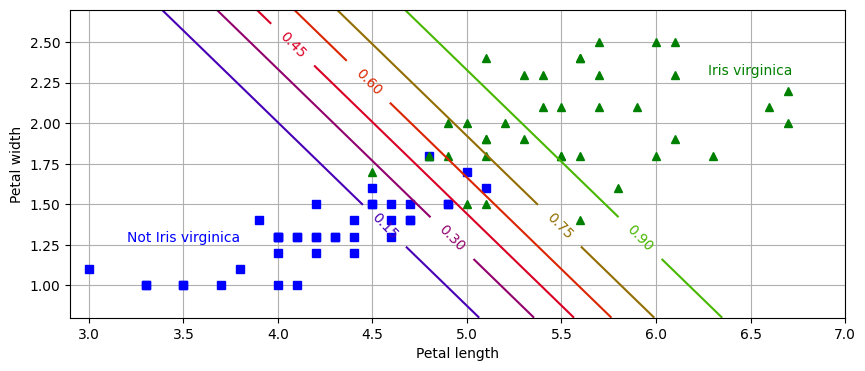

In [56]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

x0, x1 = np.meshgrid(
	np.linspace(2.9, 7, 5000).reshape(-1, 1),
	np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

left_right = np.array([2.9, 7])
boundary = ((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
			/ log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly without having to train and combine multiple binary classifies. This is called Softmax Regression, or Multinomial Logistic Regression

The idea is simple: when given an instance $x$, the Softmax Regression model first computes a score $s_{k}{x}$ for each class k, then estimates the probability of each class by applying the *softmax function* to the scores.

*softmax score for class k*:
$$
s_{k}(x)=x^{T}\theta^{k}
$$

Once you have computed the score of every class for the instance $x$, you can estimate the probability $\hat{p_{k}}$ that the instance belongs to class $k$ by running the scores through the softmax function

*Softmax function*:
$$
\hat{p_{k}}=\sigma(s(x))_{k}=\frac{\text{exp}(s_{k}(x))}{\sum_{j=1}^{K}\text{exp}(s_{j}(x))}
$$

In this equation:
- $K$ is the number of classes
- $s(x)$ is a vector containing the scores of each class for the instance $x$
- $\sigma(x(k))_{k}$ is the estimated probability that the instance $x$ belongs to class $k$, given the scores of each class for that instance


Softmax Regression classifier prediction
$$
\hat{y} = \arg\max_k \, \sigma(\mathbf{s}(\mathbf{x}))_k
= \arg\max_k \, s_k(\mathbf{x})
= \arg\max_k \left( \boldsymbol{\theta}^{(k)\top} \mathbf{x} \right)
$$

*Cross entropy cost function*:

$$
J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_{k}^{(i)}\log{(\hat{p}_k^{(i)}})
$$

In [57]:

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,30
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
softmax_reg.predict([[5, 2]])

array([2])

In [59]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

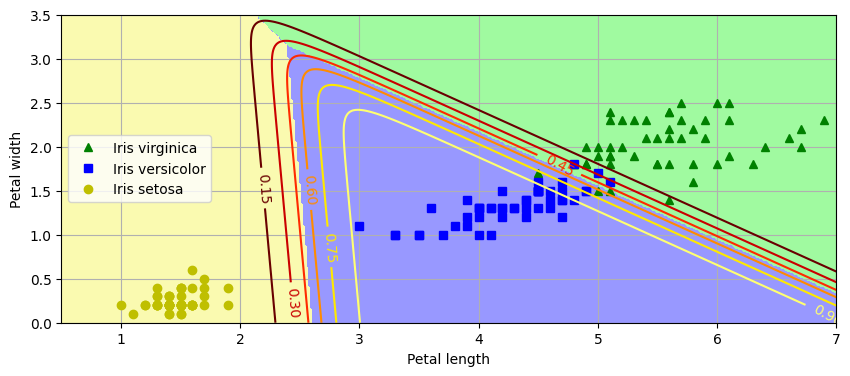

In [60]:

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
					 np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

# 📘 Exercises & Tips: Linear Models and Gradient Descent

---

### **1) Millions of Features – Which Algorithm?**

Use:

* ✅ **SGD**, **Mini-batch GD**, or **Batch GD** (if memory allows)

Avoid:

* ❌ **Normal Equation** or **SVD** → computational complexity grows **quadratically** or worse with the number of features

---

### **2) Different Feature Scales – What Happens?**

* GD-based algorithms may suffer:

  * Cost function becomes an **elongated bowl**
  * Slows down convergence
* Regularized models may **penalize large features more**
* ✅ **Solution**: Always **scale features** (e.g., standardization)

> 🔹 Note: Normal Equation and SVD **do not require** scaling.

---

### **3) Can Gradient Descent Get Stuck in a Local Minimum (Logistic Regression)?**

* ❌ **No**, the cost function for logistic regression is **convex**
* Gradient Descent will converge to the **global minimum** (if properly configured)

---

### **4) Do All GD Variants Converge to the Same Solution?**

* For **convex** problems: yes, if learning rate is small enough
* But:

  * **SGD / MBGD** never truly converge — they oscillate
  * ✅ Solution: **gradually reduce the learning rate**

---

### **5) Validation Error Increasing During BGD Training?**

Two possible cases:

1. 🔴 If **training error also increases** → **learning rate too high** → model diverging
2. 🟠 If **training error is stable but validation increases** → **overfitting** → stop training early

---

### **6) Should You Stop MBGD When Validation Error Rises?**

* ❌ No. Mini-batch and SGD have **random fluctuations**
* Short-term increases in validation error do **not** mean the model is failing
* ✅ Use **early stopping** with patience or smoothing

---

### **7) Which GD Is Fastest? Which Converges?**

| Algorithm | Speed                      | Convergence                  |
| --------- | -------------------------- | ---------------------------- |
| SGD       | 🚀 Fastest (1 sample/step) | ❌ Doesn't fully converge     |
| MBGD      | ⚡ Fast (mini-batch)        | ❌ Doesn't fully converge     |
| BGD       | 🐢 Slow (full batch)       | ✅ Will converge (eventually) |

✅ To make SGD/MBGD converge: **decay learning rate over time**

---

### **8) Large Gap in Train vs Validation (Polynomial Regression)?**

* 🚨 High **variance** (overfitting)
* ✅ Fix by:

  1. **Reducing polynomial degree**
  2. **Adding regularization**: $\ell_2$ (Ridge), $\ell_1$ (Lasso)
  3. **Getting more training data**

---

### **9) High Training & Validation Error in Ridge Regression?**

* ❗ Indicates **high bias** (underfitting)
* ✅ Try reducing regularization parameter: $\alpha \downarrow$

---

### **10) Why Use Ridge / Lasso / Elastic Net?**

#### **Ridge over OLS:**

* ✅ Adds **L2 penalty** → prevents overfitting by shrinking coefficients
* ✅ Always solvable: $X^\top X + \alpha I$ is invertible
* ✅ Reduces variance, even with some bias → better generalization

#### **Lasso over Ridge:**

* ✅ **Automatic feature selection** (some coefficients = 0)
* ✅ Useful when only a few features are informative
* ✅ Handles collinearity by **selecting one feature** from a group

#### **Elastic Net over Lasso:**

* ✅ Shares weights across **correlated features** (more stable)
* ✅ Better when $p > n$: Lasso can select ≤ $n$ features, Elastic Net can go beyond
* ✅ Combines **L1 sparsity** with **L2 stability**

---

### **11) Indoor/Outdoor & Day/Night Classification — One Model or Two?**

* ❌ Don't use a **Softmax classifier** (multi-class)
* ✅ Use **two separate logistic regression classifiers**:

  * One for **Indoor vs Outdoor**
  * One for **Day vs Night**

> Because this is a **multi-label** classification task, not multi-class

## Batch Gradient Descent with Early stopping for Softmax Regression (without Scikit-learn)

In [61]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

For softmax regression we need to add the bias term for every instance. The easiest way to do this would be to use `add_dummy_features()` via scikit-learn.

In [62]:
X_with_bias = np.c_[np.ones(len(X)), X]

Now we should split our data into training and validation sets. The easiest way would be `train_test_split` via scikit-learn

In [63]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]


The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probability equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (In other words, the vecto of class probabilities for any given instance is a one-hot vector)

In [64]:
def to_one_hot(y):
	return np.diag(np.ones(y.max() + 1))[y]

In [65]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [66]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [67]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's scale the inputs. We compute the mean and standard deviation of each feature on the training set (except for the bias feature), then we center and scale each feature in the training/validation/testing sets

In [68]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)

X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

Now let's implement softmax function
$$\sigma(s(x))_{k}=\frac{\text(exp)(s_{k}(x))}{\sum_{j=1}^{K}\text(exp)(s_{j}(x))}$$

In [69]:
def softmax(logits):
	exps = np.exp(logits)
	exp_sum = exps.sum(axis=1, keepdims=True)
	return exps / exp_sum

In [70]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

Here come the Training part:

$$J(\mathbf{\Theta}) =-\dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$$

$$
\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$$

In [71]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.rand(n_inputs, n_outputs)

for epoch in range(n_epochs):

	logits = X_train @ Theta
	Y_proba = softmax(logits)
	if epoch % 1000 == 0:
		Y_proba_valid = softmax(X_valid @ Theta)
		xentropy_losses = - (Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
		print(epoch, xentropy_losses.sum(axis=1).mean())
	error = Y_proba - Y_train_one_hot
	gradient = 1 / m * X_train.T @ error
	Theta = Theta - eta * gradient

0 1.0839031881690684
1000 0.1474523883877436
2000 0.131450956174272
3000 0.12080624996692943
4000 0.11407817347043664
5000 0.11017251735526898


In [72]:
Theta

array([[ 0.73598238,  6.46037962, -5.13911363],
       [-6.36097303, -0.86738208,  8.13902676],
       [-5.65063738,  0.24959356,  6.92641859]])

In [73]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy = (y_predict == y_valid).mean()
accuracy

np.float64(0.9333333333333333)

Now lets add a bit of $\ell_{2}$ regularization.

In [74]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.02

np.random.seed(42)
Theta = np.random.rand(n_inputs, n_outputs)

for epoch in range(n_epochs):
	logits = X_train @ Theta
	Y_proba = softmax(logits)
	if epoch % 1000 == 0:
		Y_proba_valid = softmax(X_valid @ Theta)
		xentropy_losses = - (Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
		l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
		total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
		print(epoch, total_loss)
	error = Y_proba - Y_train_one_hot
	gradients = 1 / m * X_train.T @ error
	gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
	Theta = Theta - eta * gradients


0 1.0991236098300343
1000 0.39759499314435953
2000 0.39759507267159655
3000 0.3975950726750634
4000 0.39759507267506355
5000 0.39759507267506355


In [75]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy = (y_predict == y_valid).mean()
accuracy

np.float64(0.9333333333333333)

Now let's add early stopping.

In [76]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
C = 100
best_loss = np.inf

np.random.seed(42)
Theta = np.random.rand(n_inputs, n_outputs)

for epoch in range(n_epochs):
	logits = X_train @ Theta
	Y_proba = softmax(logits)
	Y_proba_valid = softmax(X_valid @ Theta)
	xentropy_losses = - (Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
	l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
	total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
	if epoch % 1000 == 0:
		print(epoch, total_loss)
	if total_loss < best_loss:
		best_loss = total_loss
	else:
		print(epoch - 1, best_loss.round(4))
		print(epoch, total_loss.round(4), "early stopping!")
		break
	error = Y_proba - Y_train_one_hot
	gradients = 1 / m * X_train.T @ error
	gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
	Theta = Theta - eta * gradients

0 1.0915133989995514
364 0.3259
365 0.3259 early stopping!


In [77]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

np.float64(0.9333333333333333)

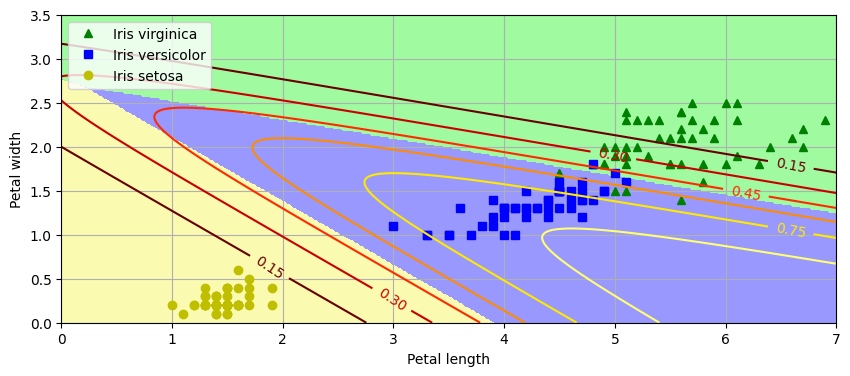

In [78]:
import matplotlib as mpl
custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

In [79]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

np.float64(0.9666666666666667)